# Nonparametric Tests

  

*   Sign tests
*   Ranks tests
*   Permutations tests

## Mirrors as potential environmental enrichment for individually housed laboratory mice

(Sherwin, 2004): 16 laboratory mice were placed in two-room cages, a mirror hung in one of the rooms. To establish whether mice have any preferences for mirrors, we measured the fraction of time that each mouse spent in each of its two cells.

In [0]:
import itertools

import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data loading

In [0]:
mouses_data = pd.read_csv('https://raw.githubusercontent.com/OzmundSedler/100-Days-Of-ML-Code/master/week_11/datasets/mirror_mouses.txt', header = None)
mouses_data.columns = ['proportion_of_time']

In [4]:
mouses_data

,proportion_of_time
0,0.348471
1,0.640620
2,0.549818
3,0.537454
4,0.400444
5,0.426292
6,0.417156
7,0.477977
8,0.450657
9,0.476602


In [5]:
mouses_data.describe()

,proportion_of_time
count,16.000000
mean,0.475289
std,0.066065
min,0.348471
25%,0.444566
50%,0.477289
75%,0.488859
max,0.640620


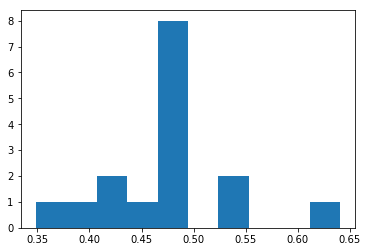

In [6]:
pylab.hist(mouses_data.proportion_of_time)
pylab.show()

## One-sample tests

In [8]:
print ('95%% confidence interval for the mean time: [%f, %f]' % zconfint(mouses_data))

95% confidence interval for the mean time: [0.442918, 0.507660]


### One-sampple sign test

$ H_0 \ colon $ median of the fraction of time spent in a cell with a mirror is 0.5

$ H_1 \ colon $ median of the fraction of time spent in a cell with a mirror is not equal to 0.5

In [12]:
print ("M: %d, p-value: %f" % sign_test(mouses_data, 0.5))

M: -5, p-value: 0.021271


### 1-sample Wilcoxon signed rank test

In [13]:
m0 = 0.5
stats.wilcoxon(mouses_data.proportion_of_time - m0)

WilcoxonResult(statistic=35.0, pvalue=0.08793560714236243)

### Permutation test

$ H_0 \ colon $ average is 0.5

$ H_1 \ colon $ average is not 0.5

In [0]:
def permutation_t_stat_1sample(sample, mean):
    t_stat = sum(list(map(lambda x: x - mean, sample)))
    return t_stat

In [17]:
permutation_t_stat_1sample(mouses_data.proportion_of_time, 0.5)

-0.3953776999999997

In [0]:
def permutation_zero_distr_1sample(sample, mean, max_permutations = None):
    centered_sample = list(map(lambda x: x - mean, sample))
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        signs_array =  itertools.product([-1, 1], repeat = len(sample))
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

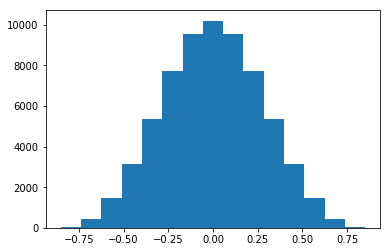

In [21]:
pylab.hist(permutation_zero_distr_1sample(mouses_data.proportion_of_time, 0.5), bins = 15)
pylab.show()

In [0]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [24]:
print ("p-value: %f" % permutation_test(mouses_data.proportion_of_time, 0.5))

p-value: 0.157776


In [26]:
print ("p-value: %f" % permutation_test(mouses_data.proportion_of_time, 0.5, 10000))

p-value: 0.160795
